# GEEK BRAINS
## Введение в нейронные сети
## ДЗ Урока 3
### Виталий Казанцев

## Практическое задание


1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. 
       Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

    
2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.
        
*3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность? </li>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras


2022-12-12 12:43:03.218376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Анализ данных

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

#### Preprocess the data

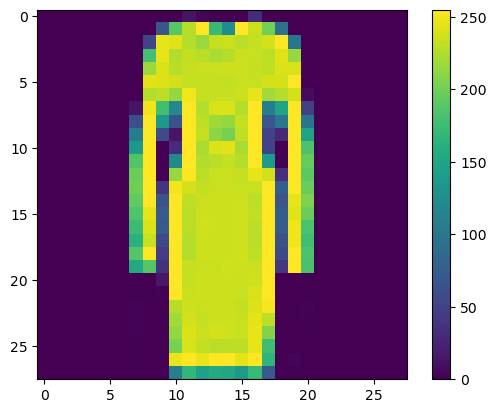

In [9]:
plt.figure()
plt.imshow(train_images[2500])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### Построение модели

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

2022-12-12 12:43:05.542954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4996 - accuracy: 0.8254
Epoch 2/3
1875/1875 [==============================] - 2s 975us/step - loss: 0.3808 - accuracy: 0.8621
Epoch 3/3
1875/1875 [==============================] - 2s 967us/step - loss: 0.3396 - accuracy: 0.8759


In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3660 - accuracy: 0.8712 - 288ms/epoch - 919us/step

Test accuracy: 0.8712000250816345


Эта модель, которую мы построили на уроке, оценка accuracy данной модели 0.87. Попробуем улучшить данную модель.

In [31]:
def make_model(layers, neuro=128):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(neuro, activation='relu'),
    ])

    for _ in range(layers):        
        model.add(keras.layers.Dense(neuro, activation='tanh'))
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    model.summary()
    model.fit(train_images, train_labels, epochs=3, validation_split=0.2)
   

In [32]:
layers = np.arange(1, 16)
for l in layers:
    make_model(l)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_141 (Dense)           (None, 128)               100480    
                                                                 
 dense_142 (Dense)           (None, 128)               16512     
                                                                 
 dense_143 (Dense)           (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


/home/vitaly/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4903 - accuracy: 0.8218 - val_loss: 0.4161 - val_accuracy: 0.8412
Epoch 2/3
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3675 - accuracy: 0.8657 - val_loss: 0.3611 - val_accuracy: 0.8658
Epoch 3/3
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3272 - accuracy: 0.8780 - val_loss: 0.3415 - val_accuracy: 0.8754
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_144 (Dense)           (None, 128)               100480    
                                                                 
 dense_145 (Dense)           (None, 128)               16512     
                                                                 
 dense_146 (Dense)           (

                                                                 
 dense_171 (Dense)           (None, 128)               16512     
                                                                 
 dense_172 (Dense)           (None, 128)               16512     
                                                                 
 dense_173 (Dense)           (None, 10)                1290      
                                                                 
Total params: 200,842
Trainable params: 200,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5250 - accuracy: 0.8108 - val_loss: 0.4642 - val_accuracy: 0.8388
Epoch 2/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4082 - accuracy: 0.8536 - val_loss: 0.3835 - val_accuracy: 0.8648
Epoch 3/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3751 - accuracy: 0.8639 - val_loss: 0

 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_204 (Dense)           (None, 128)               100480    
                                                                 
 dense_205 (Dense)           (None, 128)               16512     
                                                                 
 dense_206 (Dense)           (None, 128)               16512     
                                                                 
 dense_207 (Dense)           (None, 128)               16512     
                                                                 
 dense_208 (Dense)           (None, 128)               16512     
                                                                 
 dense_209 (Dense)           (None, 128)               16512     
                                                                 
 dense_210 (Dense)           (None, 128)               16512     
          

 dense_243 (Dense)           (None, 128)               100480    
                                                                 
 dense_244 (Dense)           (None, 128)               16512     
                                                                 
 dense_245 (Dense)           (None, 128)               16512     
                                                                 
 dense_246 (Dense)           (None, 128)               16512     
                                                                 
 dense_247 (Dense)           (None, 128)               16512     
                                                                 
 dense_248 (Dense)           (None, 128)               16512     
                                                                 
 dense_249 (Dense)           (None, 128)               16512     
                                                                 
 dense_250 (Dense)           (None, 128)               16512     
          

                                                                 
Total params: 349,450
Trainable params: 349,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7554 - accuracy: 0.7281 - val_loss: 0.6931 - val_accuracy: 0.7869
Epoch 2/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9870 - accuracy: 0.6273 - val_loss: 1.3340 - val_accuracy: 0.4369
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 1.8350 - accuracy: 0.2576 - val_loss: 2.0528 - val_accuracy: 0.1902


Наилучший результат дает модель из 4х слоев.

In [36]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.save_weights('model.two')
plt.figure(figsize=(16,7))

for i_optim in ['SGD', 'RMSProp', 'adam', 'NAdam']:
    modeli = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    modeli.load_weights('model.two')
    
    modeli.compile(optimizer=i_optim,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    print(f'Optimiser={i_optim}')
    modeli.summary()
    modeli.fit(train_images, train_labels, epochs=3, validation_split=0.2)
    print('*'*50)

Optimiser=SGD
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_36 (Flatten)        (None, 784)               0         
                                                                 
 dense_324 (Dense)           (None, 128)               100480    
                                                                 
 dense_325 (Dense)           (None, 128)               16512     
                                                                 
 dense_326 (Dense)           (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8070 - accuracy: 0.7326 - val_loss: 0.5736 - val_accuracy: 0.7976
Epoch 2/3
1500/1500 [=

<Figure size 1600x700 with 0 Axes>

Таким образом представленную модель можно улучшить добавлением одного дополнительного слоя и использованием Nadam оптимизатора.